In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

In [7]:
books = pd.read_csv(r"C:\Users\Sakthi\Downloads\books.csv")
ratings = pd.read_csv(r"C:\Users\Sakthi\Downloads\ratings.csv")


In [8]:
books['features'] = books['Title'] + " " + books['Author'] + "" + books['Genre']
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(books['features'])
content_similarity = cosine_similarity(tfidf_matrix)

In [11]:
book_index = 0 
similar_books =content_similarity[book_index].argsort()[::-1][1:4]
print("Content-Based Recommendations for 'HarryPotter':")
print(books.iloc[similar_books]['Title'].tolist())

Content-Based Recommendations for 'HarryPotter':
['Percy Jackson', 'Angels and Demons', 'The Da Vinci Code']


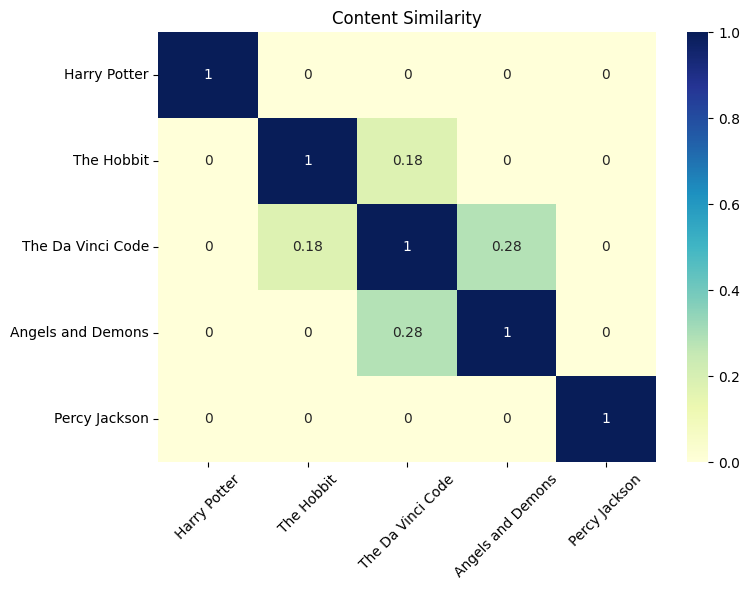

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(content_similarity, xticklabels=books['Title'],
yticklabels=books['Title'], annot=True, cmap="YlGnBu")
plt.title("Content Similarity")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
user_item_matrix = ratings.pivot_table(index='User_ID',
columns='Book_ID', values='Rating').fillna(0)
user_similarity = cosine_similarity(user_item_matrix)

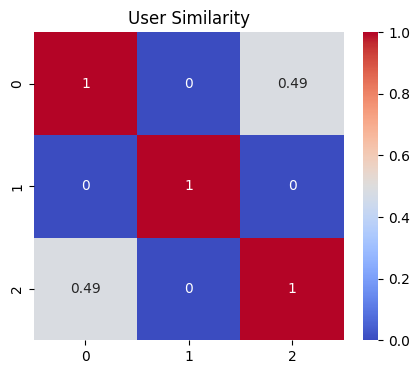

In [14]:
plt.figure(figsize=(5,4))
sns.heatmap(user_similarity, annot=True,
cmap='coolwarm')
plt.title("User Similarity")
plt.show()

In [15]:
user_sim_df = pd.DataFrame(user_similarity,
index=user_item_matrix.index,
columns=user_item_matrix.index)
similar_users =user_sim_df[1].sort_values(ascending=False)[1:]
print("\nUsers most similar to User 1:")
print(similar_users)


Users most similar to User 1:
User_ID
3    0.487805
2    0.000000
Name: 1, dtype: float64


In [18]:
content_scores = content_similarity[book_index]
user_ratings = user_item_matrix.loc[1]
aligned_ratings =user_ratings.reindex(books['Book_ID']).fillna(0).values
hybrid_score = 0.6 * content_scores + 0.4 * aligned_ratings
top_indices = np.argsort(hybrid_score)[::-1]
recommended_indices = [i for i in top_indices if i !=book_index][:3]
print("\nHybrid Recommendations for User 1:")
print(books.iloc[recommended_indices]['Title'].tolist())


Hybrid Recommendations for User 1:
['The Hobbit', 'Percy Jackson', 'Angels and Demons']
